In [1]:
# Name : Dimpal Lad
# CWID : 20023001
# Question No : 04

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
filename = 'C:/Users/dimpa/OneDrive - stevens.edu/CS-513/KDD_FinalExam/Adult_income_v2.csv'
df = pd.read_csv(filename)
print(df.dtypes)

Age                      int64
Education_Years          int64
Gender                  object
Hours_worked_Perweek     int64
Income                  object
dtype: object


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Age, Education_Years, Gender, Hours_worked_Perweek, Income]
Index: []


In [5]:
# Encode 'Gender' column using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [6]:
# Select features and target variable
features = df[['Education_Years', 'Gender', 'Hours_worked_Perweek']]
target = df['Income']

In [7]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=32)

In [9]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

In [11]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7933046683046683


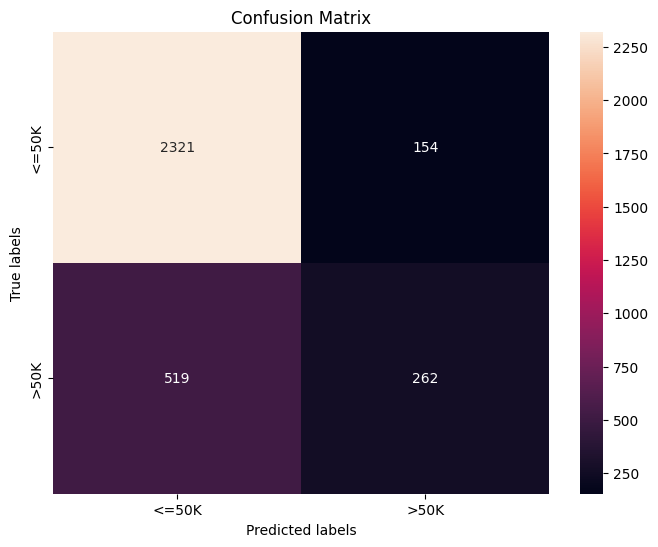

In [12]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.gca().xaxis.set_ticklabels(['<=50K', '>50K'])
plt.gca().yaxis.set_ticklabels(['<=50K', '>50K'])
plt.show()

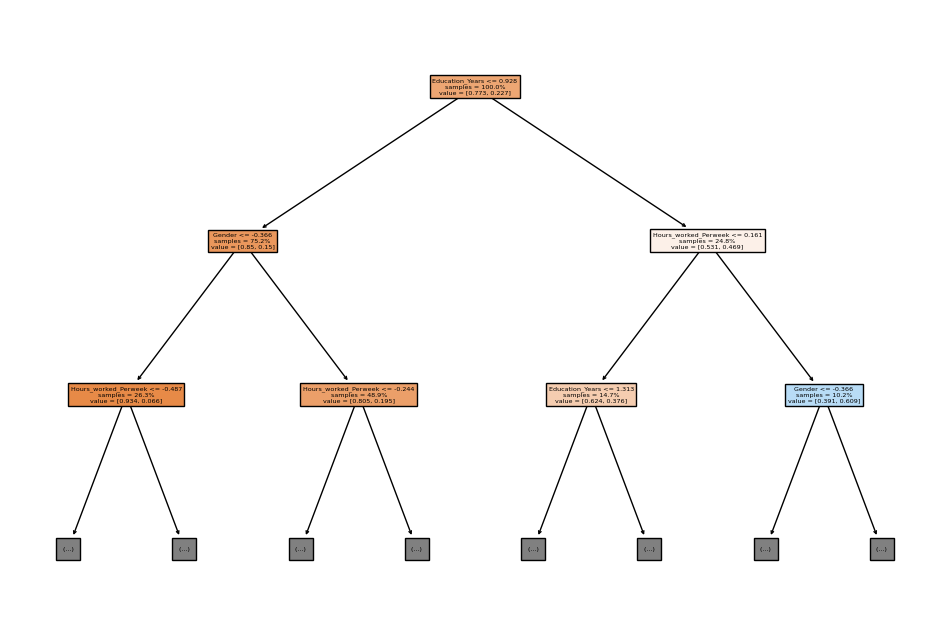

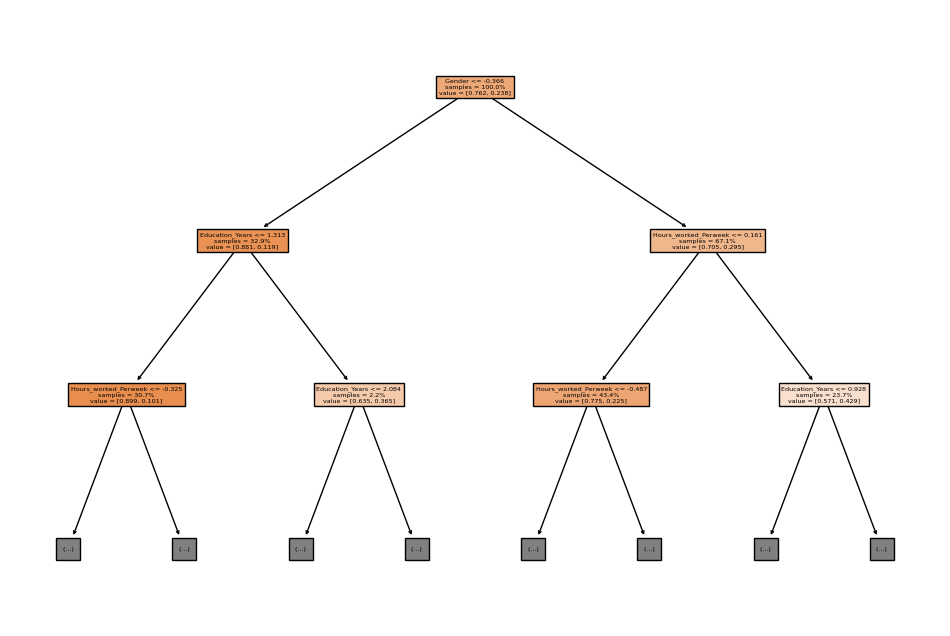

In [13]:
# Plot the first three decision trees in the random forest
feature_names = ['Education_Years', 'Gender', 'Hours_worked_Perweek']
for i in range(3):
    tree = rf_classifier.estimators_[i]
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=feature_names, filled=True, max_depth=2, impurity=False, proportion=True)
    plt.show()

In [14]:
# Calculate feature importances (Mean Decrease Accuracy)
feature_importances = rf_classifier.feature_importances_
print("Mean Decrease Accuracy of features:")
for i, feature in enumerate(features.columns):
    print(f"{feature}: {feature_importances[i]}")

Mean Decrease Accuracy of features:
Education_Years: 0.48916396498699954
Gender: 0.11794198194229845
Hours_worked_Perweek: 0.3928940530707021


In [15]:
# Calculate Gini importance
gini_importance = feature_importances * rf_classifier.estimators_[0].tree_.impurity[0]
print("\nMean Decrease Gini Indices of features:")
for i, feature in enumerate(features.columns):
    print(f"{feature}: {gini_importance[i]}")


Mean Decrease Gini Indices of features:
Education_Years: 0.17177227641524156
Gender: 0.04141589359243243
Hours_worked_Perweek: 0.13796663433243464
